# Tutorial 01: Change your Probes

Author: Tianqing Zhang

One of the functionalities in FisherA2Z is to change the probes for the Fisher forecasts. Currently, the available probes are

 - Cosmic shear ('ss')
 
 - Galaxy-galaxy lensing ('sl')
 
 - Clustering ('ll')
 
 - 2x2pt (Clustering + Galaxy-galaxy lensing) ('2x2pt')
 
 - 3x2pt (Clustering + Galaxy-galaxy lensing + Cosmic shear) ('3x2pt')

In [1]:
from fisherA2Z.fisher import Fisher

import pyccl as ccl
import matplotlib.pyplot as plt
import warnings
from fisherA2Z.fisher import Fisher, marginalize, SmailZ, Core, PhotozModel,plot_contours 

warnings.filterwarnings('ignore')

In [2]:
cosmo = ccl.Cosmology(Omega_c=0.2666, 
                       Omega_b=0.049, 
                       h=0.6727, 
                       sigma8=0.831, 
                       n_s=0.9645, 
                       transfer_function='eisenstein_hu')


We change the probe by specifying the `probe` parameter during initialization of the Fisher object

Let's make a cosmic shear forecast by `probe='ss'`, and save the derivative to `'data/obj_deriv_ss_y10.pkl'`. The derivative takes a long time to calculate, so saving it save you much time next time you run the same code. 

We set `end = 11` to include 7 cosmological parameter + 4 intrinsic alignment parameters

In [20]:

f_ss_y10 = Fisher(cosmo, probe='ss', save_deriv='data/obj_deriv_ss_y10.pkl', overwrite=True)
f_ss_y10.process()

Making source pz
Making lens pz
Making fiducial c_ells
Getting covariance matrix
Getting derivatives, number of parameters: 36
Getting derivatives of C_ell w.r.t.:  omega_m
Getting derivatives of C_ell w.r.t.:  sigma_8
Getting derivatives of C_ell w.r.t.:  n_s
Getting derivatives of C_ell w.r.t.:  w_0
Getting derivatives of C_ell w.r.t.:  w_a
Getting derivatives of C_ell w.r.t.:  omega_b
Getting derivatives of C_ell w.r.t.:  h
Getting derivatives of C_ell w.r.t.:  A0
Getting derivatives of C_ell w.r.t.:  beta
Getting derivatives of C_ell w.r.t.:  etal
Getting derivatives of C_ell w.r.t.:  etah
Getting derivatives of C_ell w.r.t.:  zbias1
Getting derivatives of C_ell w.r.t.:  zbias2
Getting derivatives of C_ell w.r.t.:  zbias3
Getting derivatives of C_ell w.r.t.:  zbias4
Getting derivatives of C_ell w.r.t.:  zbias5
Getting derivatives of C_ell w.r.t.:  zvariance1
Getting derivatives of C_ell w.r.t.:  zvariance2
Getting derivatives of C_ell w.r.t.:  zvariance3
Getting derivatives of C_el

In [21]:
f_3x2_y10 = Fisher(cosmo, probe='3x2pt', save_deriv='data/obj_deriv_3x2pt_y10.pkl', overwrite=True)
f_3x2_y10.process()

Making source pz
Making lens pz
Making fiducial c_ells
Getting covariance matrix
Getting derivatives, number of parameters: 36
Getting derivatives of C_ell w.r.t.:  omega_m
Getting derivatives of C_ell w.r.t.:  sigma_8
Getting derivatives of C_ell w.r.t.:  n_s
Getting derivatives of C_ell w.r.t.:  w_0
Getting derivatives of C_ell w.r.t.:  w_a
Getting derivatives of C_ell w.r.t.:  omega_b
Getting derivatives of C_ell w.r.t.:  h
Getting derivatives of C_ell w.r.t.:  A0
Getting derivatives of C_ell w.r.t.:  beta
Getting derivatives of C_ell w.r.t.:  etal
Getting derivatives of C_ell w.r.t.:  etah
Getting derivatives of C_ell w.r.t.:  zbias1
Getting derivatives of C_ell w.r.t.:  zbias2
Getting derivatives of C_ell w.r.t.:  zbias3
Getting derivatives of C_ell w.r.t.:  zbias4
Getting derivatives of C_ell w.r.t.:  zbias5
Getting derivatives of C_ell w.r.t.:  zvariance1
Getting derivatives of C_ell w.r.t.:  zvariance2
Getting derivatives of C_ell w.r.t.:  zvariance3
Getting derivatives of C_el

In [22]:
f_2x2_y10 = Fisher(cosmo, probe='2x2pt', save_deriv='data/obj_deriv_2x2pt_y10.pkl', overwrite=True)
f_2x2_y10.process()

Making source pz
Making lens pz
Making fiducial c_ells
Getting covariance matrix
Getting derivatives, number of parameters: 36
Getting derivatives of C_ell w.r.t.:  omega_m
Getting derivatives of C_ell w.r.t.:  sigma_8
Getting derivatives of C_ell w.r.t.:  n_s
Getting derivatives of C_ell w.r.t.:  w_0
Getting derivatives of C_ell w.r.t.:  w_a
Getting derivatives of C_ell w.r.t.:  omega_b
Getting derivatives of C_ell w.r.t.:  h
Getting derivatives of C_ell w.r.t.:  A0
Getting derivatives of C_ell w.r.t.:  beta
Getting derivatives of C_ell w.r.t.:  etal
Getting derivatives of C_ell w.r.t.:  etah
Getting derivatives of C_ell w.r.t.:  zbias1
Getting derivatives of C_ell w.r.t.:  zbias2
Getting derivatives of C_ell w.r.t.:  zbias3
Getting derivatives of C_ell w.r.t.:  zbias4
Getting derivatives of C_ell w.r.t.:  zbias5
Getting derivatives of C_ell w.r.t.:  zvariance1
Getting derivatives of C_ell w.r.t.:  zvariance2
Getting derivatives of C_ell w.r.t.:  zvariance3
Getting derivatives of C_el

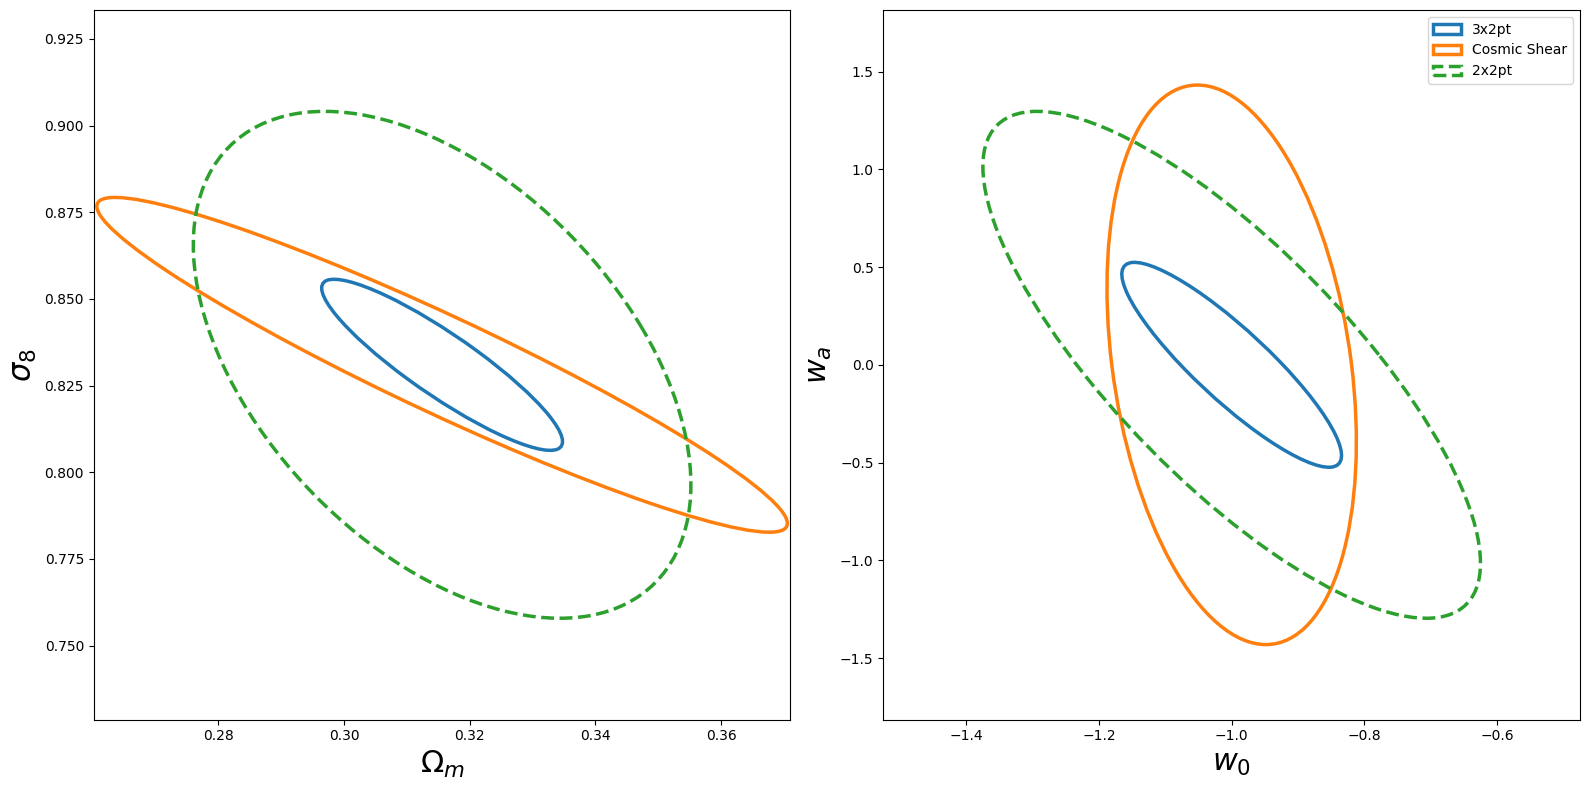

In [23]:
sizes = {}
fisher_matrix_list = []
fig, ax = plt.subplots(1, 2, figsize = (16,8))
for paramset in [[['omega_m', 'sigma_8'], ['w_0', 'w_a']]]:
    
    for j, params in enumerate(paramset):
        
        tab10 = plt.cm.get_cmap('tab10')
        colors = [tab10(i) for i in range(tab10.N)]
        arg = f_3x2_y10
        labels = ['3x2pt',  'Cosmic Shear', '2x2pt' ]
        line_styles = ['-', '-', '--', ]
        es = []
        for matrix, label, line_style, color in zip([f_3x2_y10.fisher, f_ss_y10.fisher, f_2x2_y10.fisher], labels, line_styles, colors[:3]):

            fid=(arg.vals[params[0]], arg.vals[params[1]])
            if label == 'biased':
                fid = (fid[0] + para_bias[params[0]], fid[1] + para_bias[params[1]])
            this_fisher = marginalize(matrix, 
                            arg.param_order.index(params[0]), 
                            arg.param_order.index(params[1]))
            fisher_matrix_list.append(this_fisher)
            e, xlim, ylim, size = plot_contours(
                this_fisher,
                sigmas=2, fid=fid
                )
            sizes[label] = size
                    
            e.set_label(label)
            e.set_linestyle(line_style)
            e.set_facecolor('none')
            e.set_edgecolor(color)
            e.set_linewidth(2.5)
            e.set_alpha(1)
            
            es.append(e)
            ax[j].add_artist(e)
            #limnew = 1*max(abs(para_bias[params[0]]), abs(para_bias[params[1]]))
            xlim = (arg.vals[params[0]] - 1.4* xlim, arg.vals[params[0]] + 1.4* xlim)
            ylim = (arg.vals[params[1]] - 1.4* ylim, arg.vals[params[1]] + 1.4* ylim)
            ax[j].set_xlim((xlim))
            ax[j].set_ylim((ylim))
            ax[j].set_xlabel(arg.param_labels[arg.param_order.index(params[0])], fontsize = 22)
            ax[j].set_ylabel(arg.param_labels[arg.param_order.index(params[1])], fontsize = 22)
            plt.tight_layout()
    ax[j].legend(handles=es)

        